In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_json("usersessions/train.json")  # load data


In [3]:
df['is_joe'] = df.apply(lambda x: 1 if x['user_id'] == 0 else 0, axis=1)

## 1. UNWRAPPING DATA

# a) unwrap city and country


In [ ]:
pd.DataFrame()

In [5]:
df['location'].str.split('/', expand=True)

,0,1
0,USA,Chicago
1,USA,Chicago
2,Singapore,Singapore
3,USA,Chicago
4,France,Paris
...,...,...
59995,USA,Chicago
59996,New Zealand,Auckland
59997,Netherlands,Amsterdam
59998,France,Paris


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[['country','city']] = df['location'].str.split('/', expand=True)
df[['country','city']]

,country,city
0,USA,Chicago
1,USA,Chicago
2,Singapore,Singapore
3,USA,Chicago
4,France,Paris
...,...,...
59995,USA,Chicago
59996,New Zealand,Auckland
59997,Netherlands,Amsterdam
59998,France,Paris


# b) unwrap date

In [202]:
df[["dayofweek", "day", "month"]] = df["date"].apply(lambda x: pd.Series([x.dayofweek, x.day, x.month]))

df["hour"] = df["time"].apply(lambda x: pd.to_datetime(x).hour + pd.to_datetime(x).minute/60)



In [203]:
df['locale'].unique() # ru_RU is a mistake and needs to be change to ru-RU

array(['ru_RU', 'pl-PL', 'zh-CN', 'en-SG', 'xh-ZA', 'ja-JP', 'en-NZ',
       'en-CA', 'pt-BR', 'ur-PK', 'bg-BG', 'uk-UA', 'fr-FR', 'ru-RU',
       'ro-RO', 'it-IT', 'pt-PT', 'es-MX', 'en-AU', 'de-DE', 'vi-VN',
       'nl-NL', 'en-GB', 'en-US', 'wo-SN'], dtype=object)

In [204]:
df['locale'] = df['locale'].str.replace('_', '-').replace(" ", "")

# c) unwrap history

In [31]:
history = df['sites'].apply(pd.Series)

df['number_of_sites'] = df["sites"].apply(len)
df['total_session_time'] = history.apply(lambda x: x.str['length']).sum(axis=1)



In [32]:
history.notnull().sum(axis=1)

0        6
1        9
2        7
3        2
4        9
        ..
59995    6
59996    5
59997    4
59998    5
59999    8
Length: 60000, dtype: int64

In [206]:
sites = history.apply(lambda x: x.str["site"])

df_joe = df[df["user_id"] == 0]
history_joe = df_joe["sites"].apply(pd.Series)
sites_joe = history_joe.apply(lambda x: x.str["site"])


In [22]:
history.apply(lambda x: x.str['length']).sum(axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"{'site': 'mail.google.com', 'length': 50}","{'site': 'toptal.com', 'length': 132}","{'site': 'slack.com', 'length': 65}","{'site': 'lenta.ru', 'length': 59}","{'site': 'youtube.com', 'length': 67}","{'site': 'chitay-knigi.ru', 'length': 108}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'site': 'meduza.org', 'length': 40}","{'site': 'disqus.com', 'length': 61}","{'site': 'youtube.com', 'length': 202}","{'site': 'wikipedia.org', 'length': 127}","{'site': 'bulgarie-bg.com', 'length': 141}","{'site': 'lijit.com', 'length': 79}","{'site': 'com.cn', 'length': 48}","{'site': 'novethic.fr', 'length': 269}","{'site': 'elec44.fr', 'length': 109}",NaN,NaN,NaN,NaN
2,"{'site': 'facebook.net', 'length': 74}","{'site': 'live.com', 'length': 246}","{'site': 'youtube.com', 'length': 109}","{'site': 'baidu.com', 'length': 95}","{'site': 'digitaltrends.com', 'length': 74}","{'site': 'womensinfluencernetwork.com', 'lengt...","{'site': 'mozilla.com', 'length': 376}",NaN,NaN,NaN,NaN,NaN,NaN
3,"{'site': 'live.com', 'length': 79}","{'site': 'livraddict.com', 'length': 145}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'site': 'cnn.com', 'length': 65}","{'site': 'baidu.com', 'length': 188}","{'site': 'cedexis.com', 'length': 260}","{'site': 'googleapis.com', 'length': 202}","{'site': 'facebook.com', 'length': 55}","{'site': 'geekosystem.com', 'length': 48}","{'site': 'funlabo.com', 'length': 45}","{'site': 'apprendre-en-ligne.net', 'length': 456}","{'site': 'xidx.org', 'length': 354}",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,"{'site': 'toptal.com', 'length': 191}","{'site': 'slack.com', 'length': 136}","{'site': 'vk.com', 'length': 188}","{'site': 'highwire.com', 'length': 75}","{'site': 'hibaislam.com', 'length': 150}","{'site': 'drupal.org', 'length': 96}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,"{'site': 'vk.com', 'length': 126}","{'site': 'slack.com', 'length': 63}","{'site': 'youtube.com', 'length': 46}","{'site': 'dartfish.tv', 'length': 72}","{'site': 'issuu.com', 'length': 202}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,"{'site': 'slack.com', 'length': 74}","{'site': 'youtube.com', 'length': 43}","{'site': 'vk.com', 'length': 70}","{'site': 'mmhp.net', 'length': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,"{'site': 'lenta.ru', 'length': 82}","{'site': 'toptal.com', 'length': 103}","{'site': 'vk.com', 'length': 133}","{'site': 'mail.google.com', 'length': 127}","{'site': 'youtube.com', 'length': 251}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
unique_sites = (
sites_joe
.groupby([0, 1, 2])
.size()
.reset_index(name="count")
.sort_values(by='count', ascending=False)
.head(15)
)

In [208]:
column_values = unique_sites[[0, 1, 2]].astype(str).values
fav_sites =  np.unique(column_values)
fav_sites

array(['blogadda.com', 'jeuxonline.info', 'lenta.ru', 'mail.google.com',
       'slack.com', 'toptal.com', 'ucoz.net', 'vk.com', 'youtube.com'],
      dtype=object)

In [209]:
df.fillna(0, inplace=True)

In [210]:
timezones = dict()
timezones = {
    "Chicago": -6,
    "Singapore": 8,
    "Paris": 1,
    "Berlin": 1,
    "San Francisco": -8,
    "Shanghai": 9,
    "Auckland": 13,
    "Kuala Lumpur": 8,
    "Moscow": 3,
    "Rio de Janeiro": -3,
    "Toronto": -5,
    "Madrid": 1,
    "Miami": -5,
    "Delhi": 5.5,
    "Amsterdam": 1,
    "Tokyo": 9,
    "London": 0,
    "Rome": 1,
    "Sydney": 11,
    "New York": -5,
    "Vancouver": -8,
}


## Getting insights from visited sites order 

In [211]:
(
    sites.groupby([0, 1])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(15)
)


,0,1,count
3806,toptal.com,lenta.ru,1128
2321,lenta.ru,toptal.com,916
2634,mail.google.com,vk.com,898
3571,slack.com,youtube.com,864
2642,mail.google.com,youtube.com,763
4319,vk.com,mail.google.com,747
2625,mail.google.com,toptal.com,696
3885,toptal.com,toptal.com,640
3549,slack.com,toptal.com,601
3868,toptal.com,slack.com,598


In [213]:
sites.fillna('', inplace=True)

In [214]:
def clean_sites(x):
    if x in fav_sites:
        return x
    elif x == "":
        return "empty"
    else:
        return "other"


In [27]:
sites

NameError: name 'sites' is not defined

In [26]:
history.apply(lambda x: x.str['site']).columns

RangeIndex(start=0, stop=13, step=1)

In [28]:
history.columns

RangeIndex(start=0, stop=13, step=1)

In [215]:
for i in sites.columns:
    df["page_"+str(i)] = sites[i].apply(clean_sites)

In [216]:
(
    df.groupby(["page_0", "page_1"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    # .shape
    .head(10)
)


,page_0,page_1,count
20,other,other,29694
54,youtube.com,other,2620
25,other,youtube.com,1918
21,other,slack.com,1453
29,slack.com,other,1348
22,other,toptal.com,1154
37,toptal.com,other,1138
35,toptal.com,lenta.ru,1128
6,lenta.ru,toptal.com,916
15,mail.google.com,vk.com,898


In [217]:
useful_cols = df.drop(
    ["user_id", "date", "is_joe", "location", "time", "sites"], axis=1
).columns
object_cols = list(df[useful_cols].select_dtypes(include=["object"]).columns)
object_cols
# low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 8]
# high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))


['browser',
 'os',
 'locale',
 'gender',
 'country',
 'city',
 'page_0',
 'page_1',
 'page_2',
 'page_3',
 'page_4',
 'page_5',
 'page_6',
 'page_7',
 'page_8',
 'page_9',
 'page_10',
 'page_11',
 'page_12']

In [257]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [258]:
pd.factorize(df['browser'])[0]

array([0, 0, 1, ..., 3, 0, 0])

In [259]:
df.columns

Index(['browser', 'os', 'locale', 'user_id', 'gender', 'location', 'sites',
       'time', 'date', 'is_joe', 'country', 'city', 'dayofweek', 'day',
       'month', 'hour', 'number_of_sites', 'total_session_time', 'page_0',
       'page_1', 'page_2', 'page_3', 'page_4', 'page_5', 'page_6', 'page_7',
       'page_8', 'page_9', 'page_10', 'page_11', 'page_12'],
      dtype='object')

In [260]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: is_joe, Length: 60000, dtype: int64

In [261]:
X = df[useful_cols].copy()
y = df["is_joe"].astype(int)

for col in object_cols:
    try:
        X[col] = pd.factorize(X[col])[0]

    except ValueError as e:
        print("error")


In [262]:
# X = df[useful_cols].copy()
# X.sample(5)

In [263]:
X

,browser,os,locale,gender,country,city,dayofweek,day,month,hour,...,page_3,page_4,page_5,page_6,page_7,page_8,page_9,page_10,page_11,page_12
0,0,0,0,0,0,0,6,8,1,9.050000,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,2,5,10,13.950000,...,1,1,0,1,1,1,0,0,0,0
2,1,0,2,0,1,1,1,28,3,2.100000,...,1,1,0,1,0,0,0,0,0,0
3,0,2,3,1,0,0,2,10,2,0.083333,...,2,2,1,0,0,0,0,0,0,0
4,2,1,4,0,2,2,1,28,3,14.916667,...,1,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,1,3,1,0,0,0,1,2,14.983333,...,1,1,0,0,0,0,0,0,0,0
59996,1,2,15,0,5,6,4,30,12,6.033333,...,1,1,1,0,0,0,0,0,0,0
59997,3,4,14,0,12,14,4,27,1,10.450000,...,1,2,1,0,0,0,0,0,0,0
59998,0,2,0,0,2,2,1,6,12,14.283333,...,5,0,1,0,0,0,0,0,0,0


In [276]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.35, random_state=43, stratify=y
)


In [277]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:47:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [278]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

predictions = my_model.predict(X_test)
print("ROC: " + str(roc_auc_score(predictions, y_test)))
print("F1: " + str(f1_score(predictions, y_test)))

ROC: 0.974532174044159
F1: 0.9306930693069307


In [279]:
from eli5 import show_weights
show_weights(my_model)

TypeError: 'NoneType' object is not iterable

In [280]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold


In [281]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20901
           1       0.91      0.95      0.93        99

    accuracy                           1.00     21000
   macro avg       0.96      0.97      0.97     21000
weighted avg       1.00      1.00      1.00     21000



In [2]:
def categorial_feature_overview(feature, rotation = 0, hue = None, df=df):
    print(feature, 'has', df[feature].isnull().sum() / len(df) * 100, '% of null values')
    f,ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].tick_params(labelrotation = rotation)
    ax[1].tick_params(labelrotation = rotation)
    sns.countplot(data = df, x = feature, ax = ax[0], hue=hue)
    sns.kdeplot(data = df, x = 'total_session_time', ax = ax[1], hue= feature, shade=True)
    plt.show()

NameError: name 'df' is not defined

browser has 0.0 % of null values


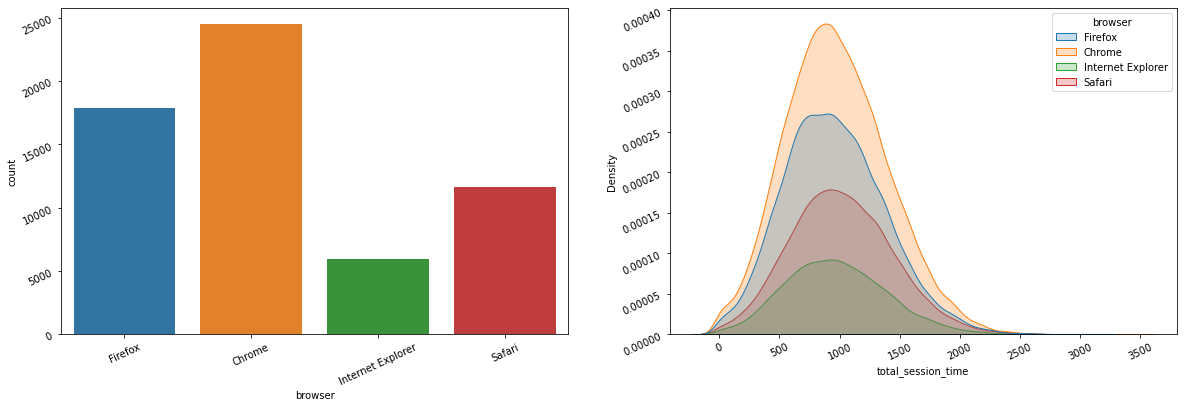

os has 0.0 % of null values


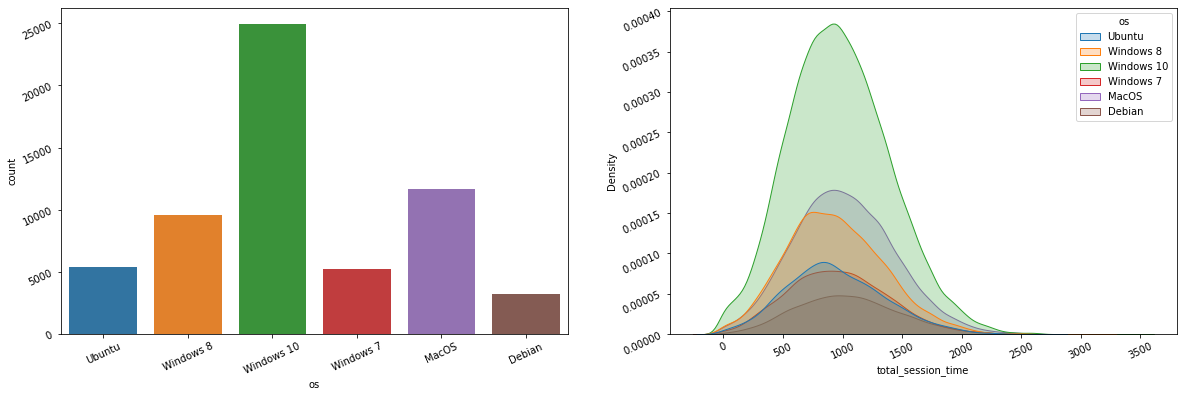

locale has 0.0 % of null values


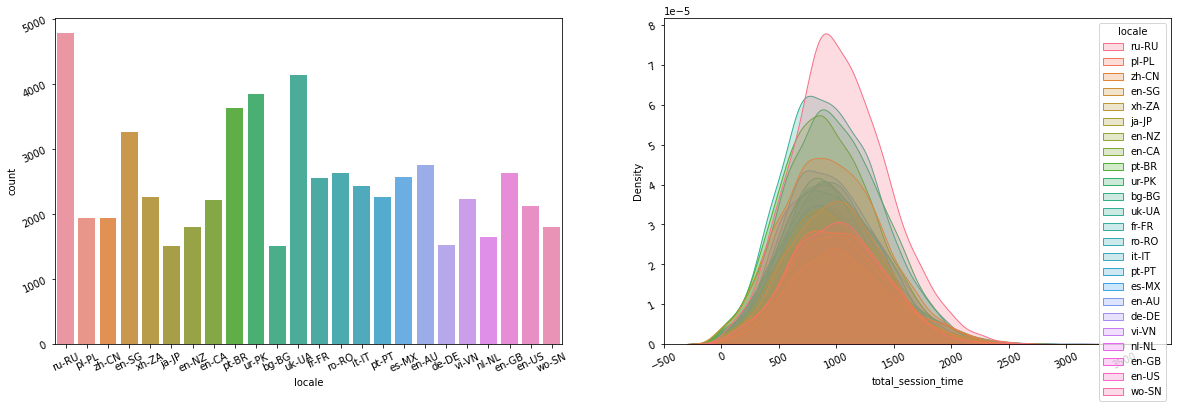

gender has 0.0 % of null values


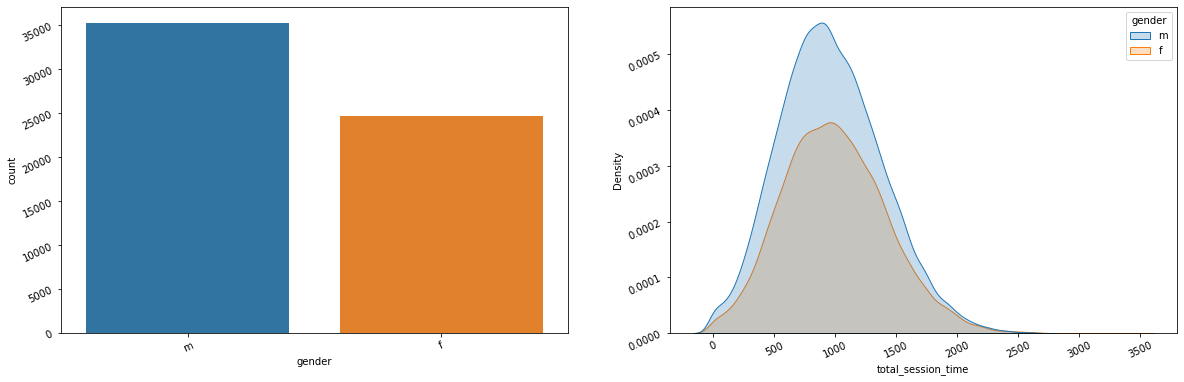

country has 0.0 % of null values


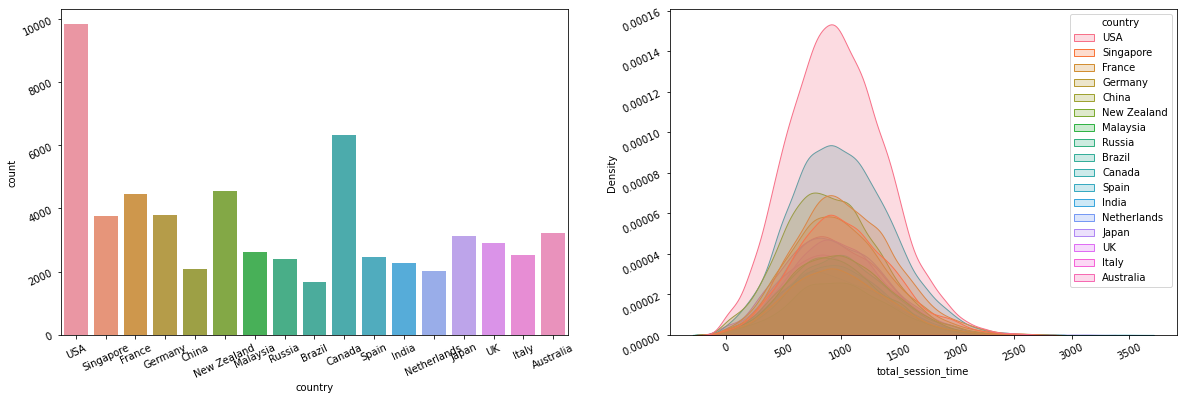

city has 0.0 % of null values


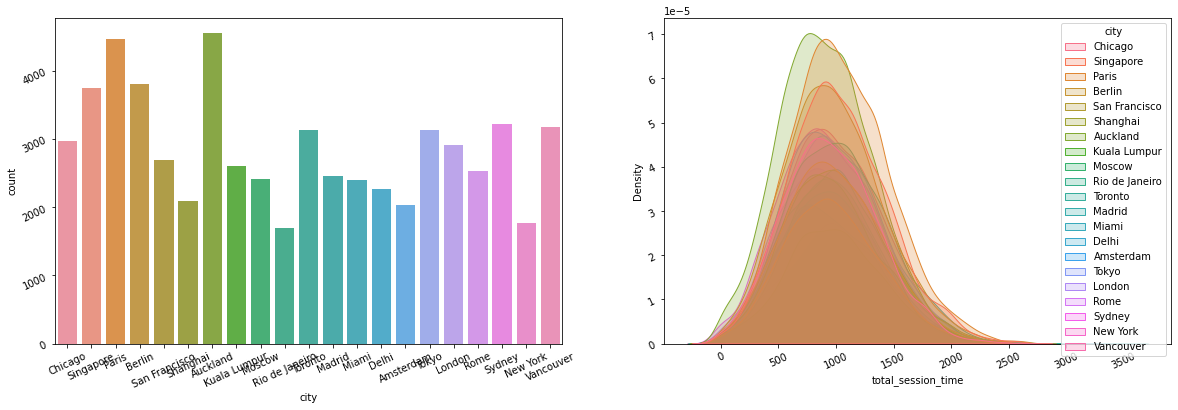

page_0 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


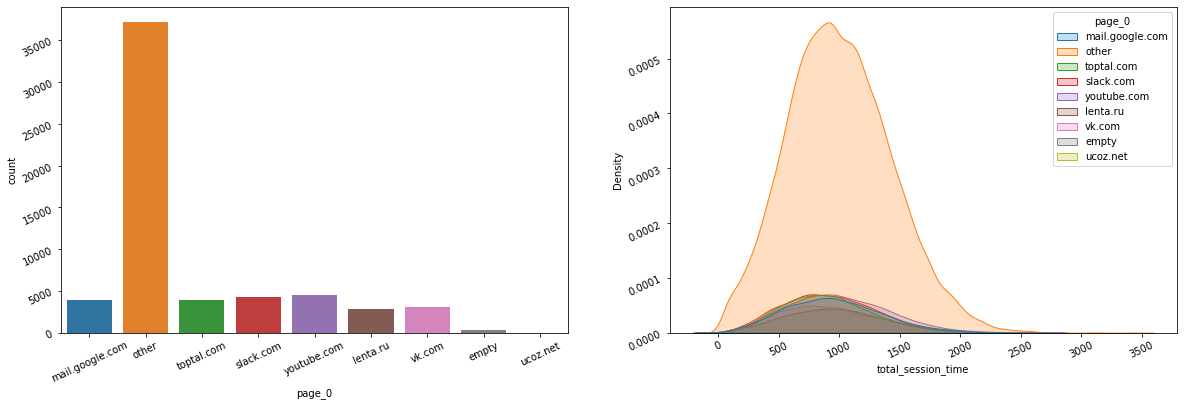

page_1 has 0.0 % of null values


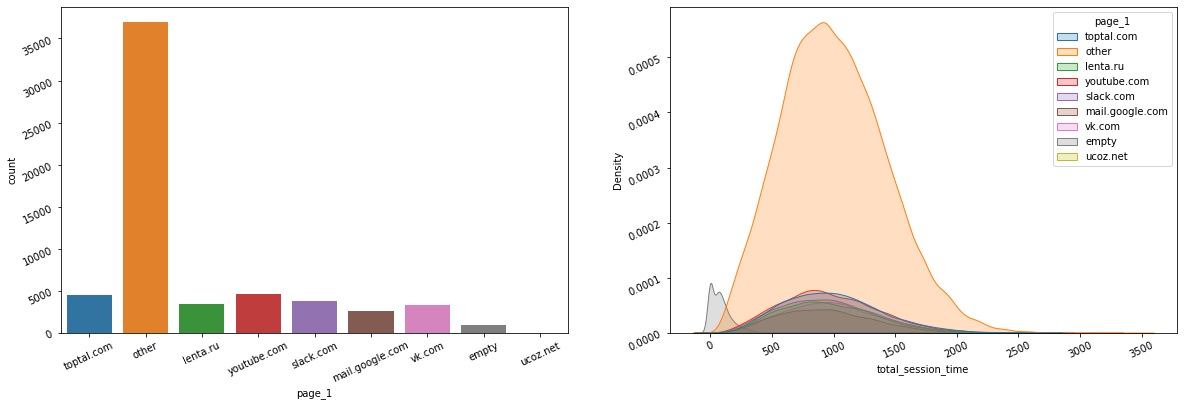

page_2 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


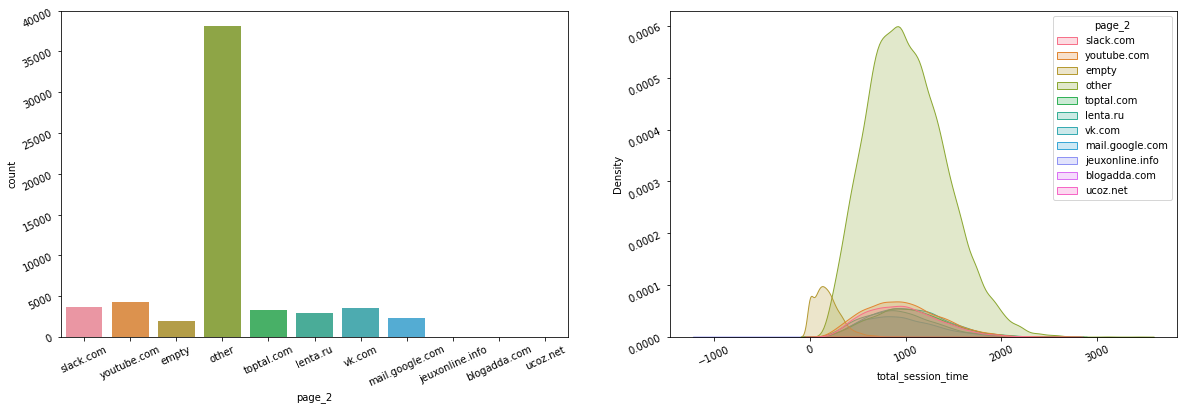

page_3 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


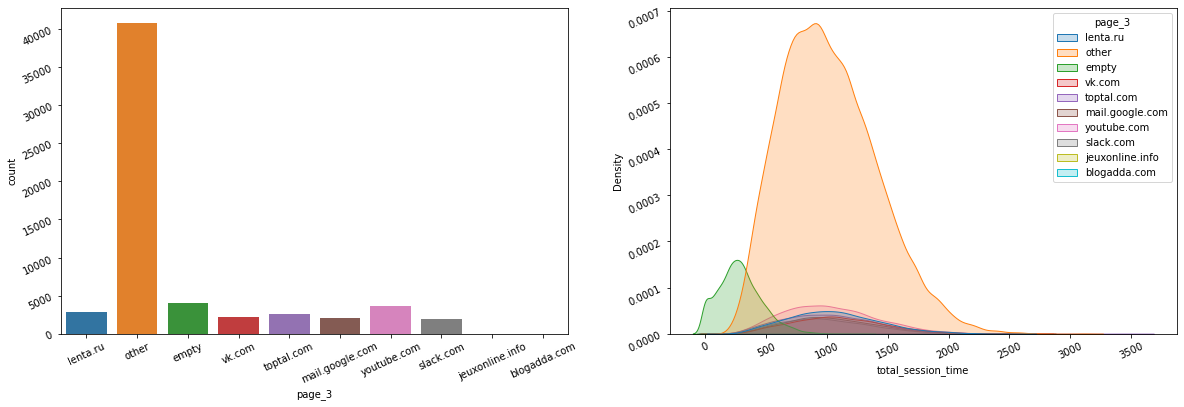

page_4 has 0.0 % of null values


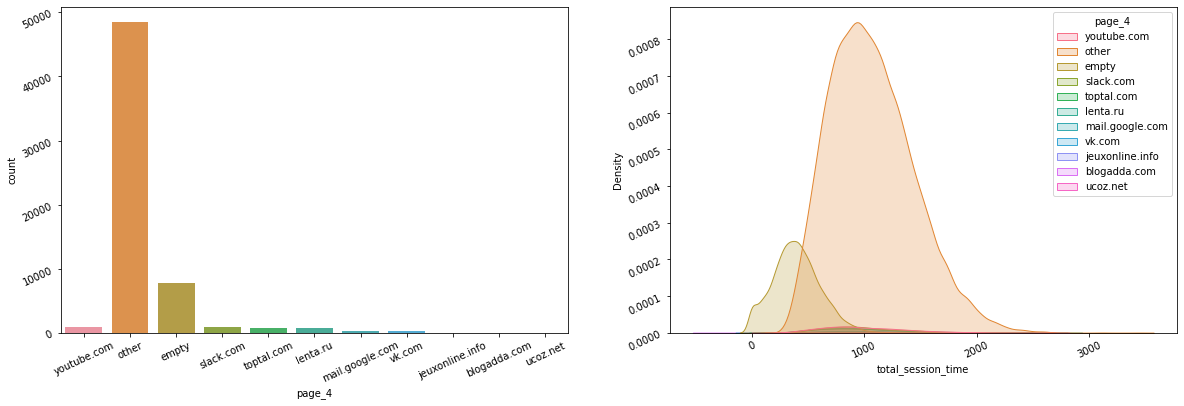

page_5 has 0.0 % of null values


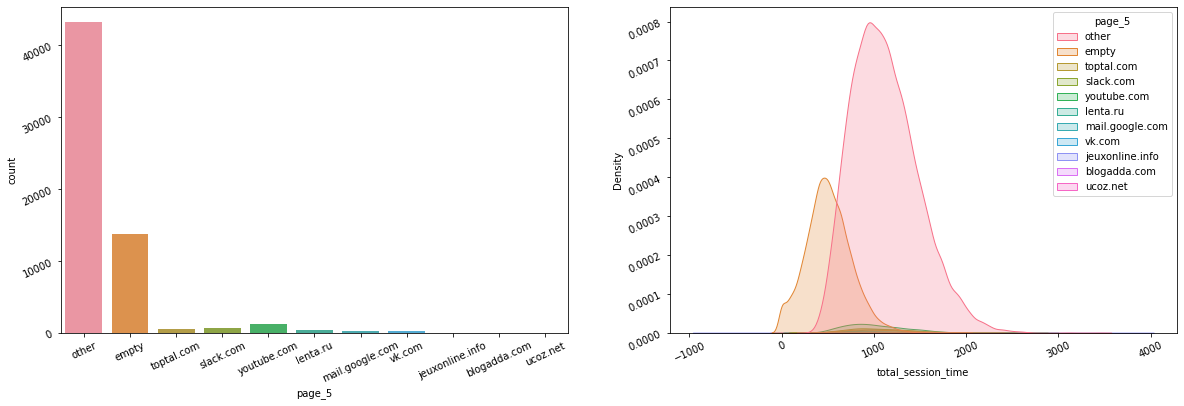

page_6 has 0.0 % of null values


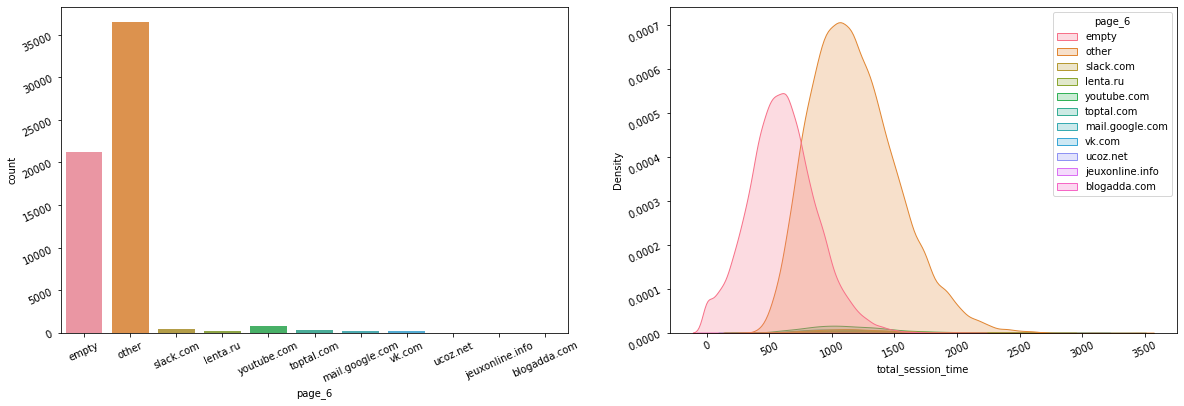

page_7 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


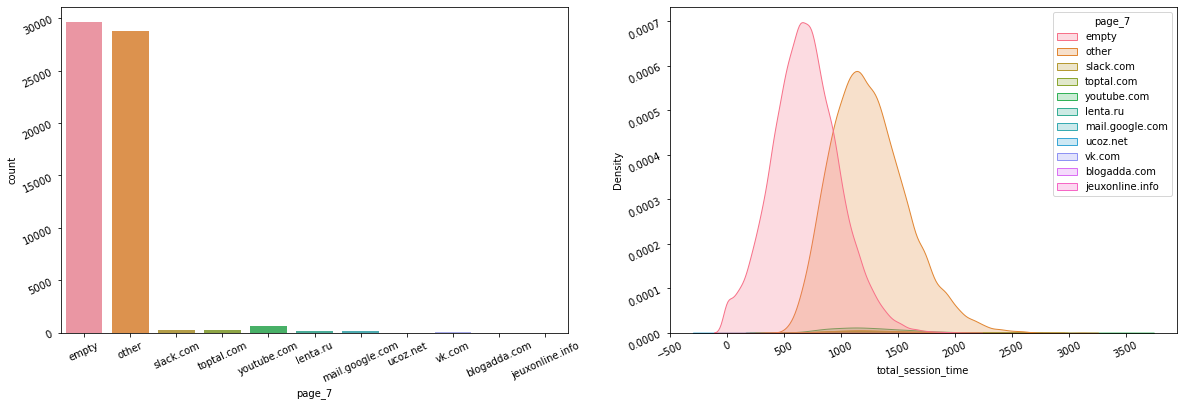

page_8 has 0.0 % of null values


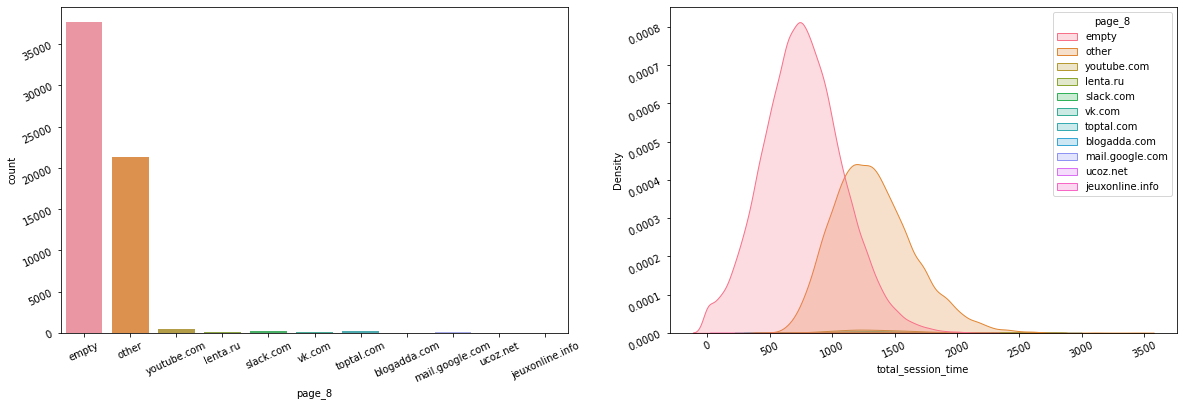

page_9 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


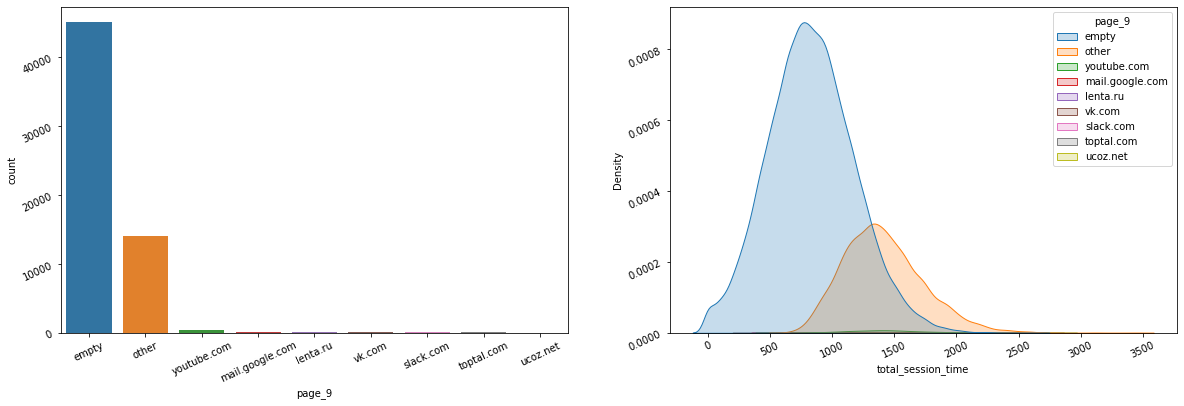

page_10 has 0.0 % of null values


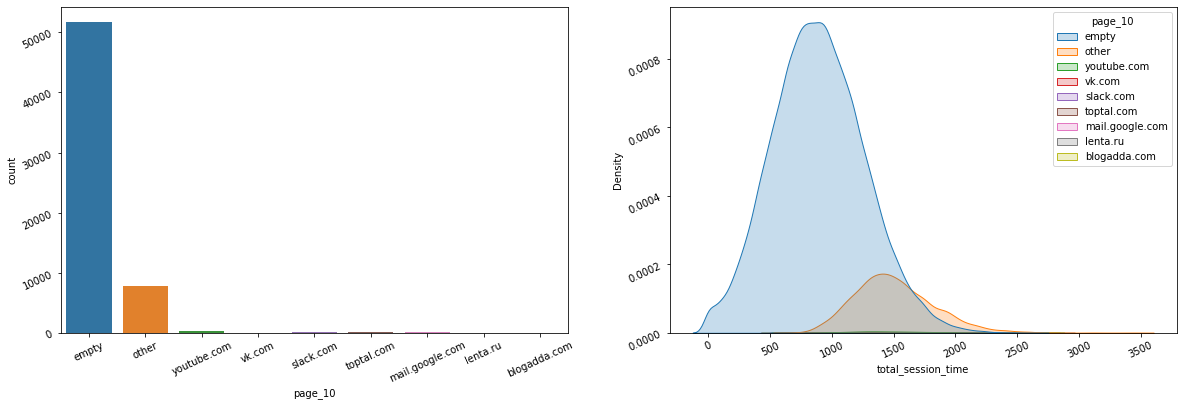

page_11 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


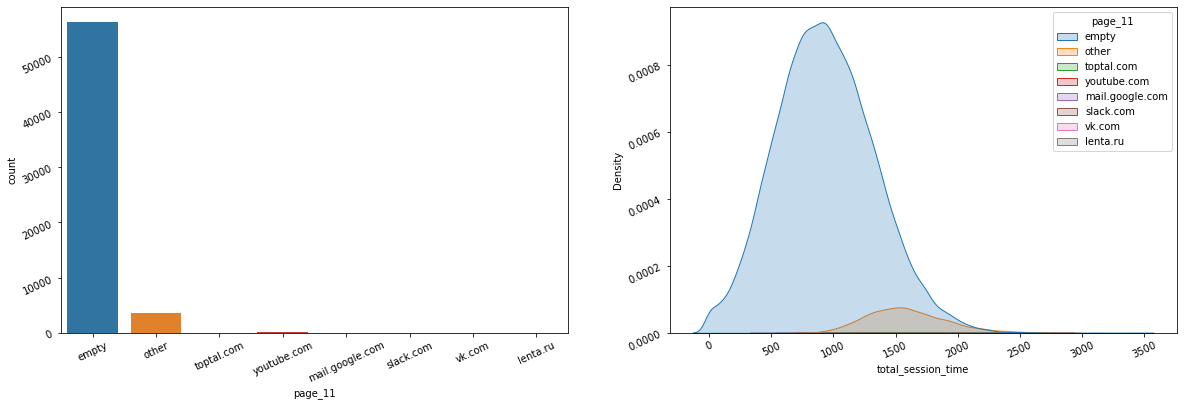

page_12 has 0.0 % of null values


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


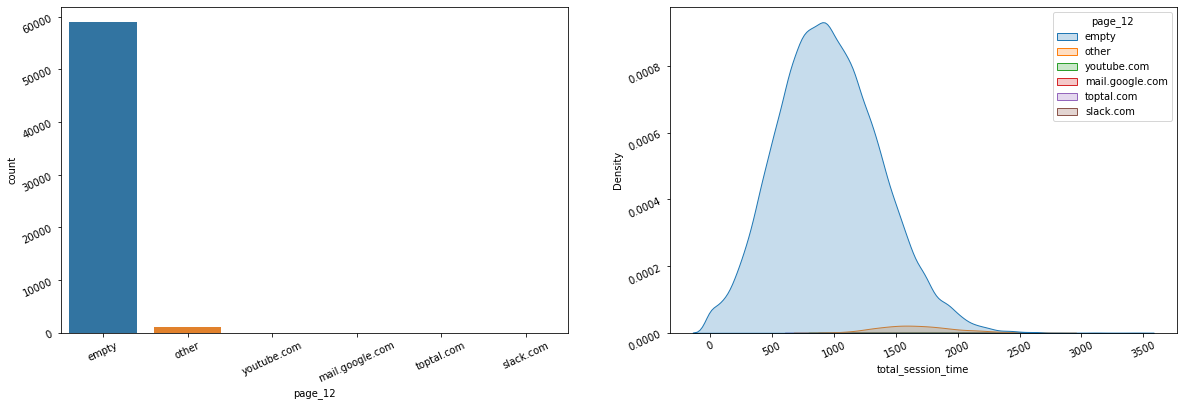

In [283]:
for col in object_cols:
    categorial_feature_overview(col, rotation=25)

In [284]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe




In [358]:
space = {
    "learning_rate": hp.uniform("learning_rate", 0, 3),
    "max_depth": hp.quniform("max_depth", 2, 12, 1),
    "gamma": hp.uniform("gamma", 0, 30),
    "reg_alpha": hp.uniform("reg_alpha", 0, 30),
    "reg_lambda": hp.uniform("reg_lambda", 0, 5),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.3, 1),
    "min_child_weight": hp.quniform("min_child_weight", 0, 15, 1),
    "n_estimators": hp.quniform("n_estimators", 100, 500, 10),
    "seed": 0,
}


In [364]:
def objective(space):
    clf = xgb.XGBClassifier(
        objective="binary:logistic",
        use_label_encoder=False,
        learning_rate=space["learning_rate"],
        n_estimators=int(space["n_estimators"]),
        max_depth=int(space["max_depth"]),
        gamma=space["gamma"],
        reg_alpha=int(space["reg_alpha"]),
        min_child_weight=int(space["min_child_weight"]),
        colsample_bytree=int(space["colsample_bytree"]),
    )

    evaluation = [(X_train, y_train), (X_test, y_test)]

    clf.fit(
        X_train,
        y_train,
        eval_set=evaluation,
        eval_metric="auc",
        early_stopping_rounds=10,
        verbose=False,
    )

    pred = clf.predict(X_test)
    f1 = f1_score(y_test, pred)
    print("SCORE:", f1)
    return {"loss": -f1, "status": STATUS_OK}


In [380]:
trials = Trials()

best_hyperparams = fmin(
    fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials
)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: Invalid Parameter format for max_depth expect int but value='4.0'



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]


XGBoostError: Invalid Parameter format for max_depth expect int but value='4.0'

In [374]:
# initializing XGBoost Classifier with best model parameters
best_clf = xgb.XGBClassifier(use_label_encoder=False, n_estimators=300)


In [375]:
best_hyperparams


{'colsample_bytree': 0.6643449340885329,
 'gamma': 7.982138746612046,
 'learning_rate': 1.1281556432004876,
 'max_depth': 5.0,
 'min_child_weight': 6.0,
 'n_estimators': 400.0,
 'reg_alpha': 1.22819194190168,
 'reg_lambda': 4.668063814386368}

In [376]:
best_clf.fit(X_train, y_train)


[15:59:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [377]:
Y_pred = best_clf.predict(X_test)
print("The f1-score on the test data is: {0:.2f}".format(roc_auc_score(y_test, Y_pred)))


In [411]:
### Step 1 : defining the objective function
def objective(params, n_folds=5):

    # Converting pandas dataframe into xgboost format
    d_train = xgb.DMatrix(X, y)

    # Running cross validation on your xgboost model
    cv_results = xgb.cv(
        params,
        d_train,
        nfold=n_folds,
        stratified=True,
        early_stopping_rounds=25,
        metrics="auc",
        seed=0,
    )

    # returns the loss on validation set
    loss = max(cv_results["test-auc-mean"])
    return loss


### step 2 : defining the search space
xgb_space = {
    #    max_depth : maximum depth allowed for every tree
    # hp.choice.choice will select 1 value from the given list
    "max_depth": hp.hp.choice("max_depth", np.arange(3, 14, 1, dtype=int)),
    #    subsample : maximum allowed rows for every tree
    "subsample": hp.hp.quniform("subsample", 0.5, 1.0, 0.05),
    #    colsample_bytree : maximum allowed features for every tree
    # hp.hp.quniform returns a float between a given range
    "colsample_bytree": hp.hp.quniform("colsample_bytree", 0.5, 1, 0.05),
    #    min_child-weight : minimum number of instances required in each node
    "min_child_weight": hp.hp.quniform("min_child_weight", 100, 1000, 100),
    #    reg_alpha : L1 regularisation term on weights
    "reg_alpha": hp.hp.uniform("reg_alpha", 0.0, 1.0),
    #    reg_lambda : L2 regularisation term on weights
    "reg_lambda": hp.hp.uniform("reg_lambda", 0.0, 1.0),
    "min_child_weight": hp.hp.uniform("min_child_weight", 0, 10),
    "num_boost_round": hp.hp.choice(
        "num_boost_round", np.arange(50, 400, 20, dtype=int)
    ),
    "learning_rate": hp.hp.quniform("learning_rate", 0, 1, 0.001),
}


### step 3 : storing the results of every iteration
bayes_trials = Trials()
MAX_EVALS = 200

# Optimize
best = fmin(
    fn=objective,
    space=xgb_space,
    algo=hp.tpe.suggest,
    max_evals=MAX_EVALS,
    trials=bayes_trials,
)

### best will the return the the best hyperparameter set


[16:47:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:47:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:47:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

In [412]:
best_clf = xgb.XGBClassifier(use_label_encoder=False, **best)

In [413]:
best_clf.fit(X_train, y_train)
Y_pred = best_clf.predict(X_test)
print('The f1-score on the test data is: {0:.2f}'.format(roc_auc_score(y_test, Y_pred)))


[16:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The f1-score on the test data is: 0.84


In [414]:
print(classification_report(Y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20924
           1       0.69      0.93      0.79        76

    accuracy                           1.00     21000
   macro avg       0.84      0.97      0.90     21000
weighted avg       1.00      1.00      1.00     21000

